In [38]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# 1.loding and preprocessing the image data

In [39]:
# load CIFAR-10 dataset
(x_train, y_train),(x_test,y_test) = cifar10.load_data()


In [40]:
# Normalize pixel values(0-255 --> 0-1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [41]:
print(f"Number of images     : {x_train.shape[0]}")
print(f"Image height (pixels): {x_train.shape[1]}")
print(f"Image width  (pixels): {x_train.shape[2]}")
print(f"Color channels       : {x_train.shape[3]}") #RGB

Number of images     : 50000
Image height (pixels): 32
Image width  (pixels): 32
Color channels       : 3


In [42]:
x_train.shape

(50000, 32, 32, 3)

In [43]:
x_train.max()

np.float32(1.0)

In [44]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [45]:
y_train.shape

(50000, 10)

In [46]:
df = pd.DataFrame(y_train)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [48]:
# # Pick an index
# idx = 1

# # Get integer label from one-hot encoding
# label = np.argmax(y_train[idx])
# print("Label:", label)

In [49]:
# # Show image

# plt.imshow(x_train[idx])
# plt.title(f"Label: {label}")
# plt.axis('off')
# # plt.show()

In [50]:
#  Define the model's architecture (by using CNN)
model = Sequential([
    #first layer
    Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)),MaxPooling2D((2,2)),
    #second layer
    Conv2D(64, (3,3),activation='relu'),MaxPooling2D((2,2)), # it is like tupple as an input

    #flatten --> Dense layers
    Flatten(),
    Dense(129,activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # 10 classes for Cifar-10    
])

c:\Users\tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 129)            │       297,345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 129)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,037 (1.21 MB)

 Trainable params: 318,037 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

# 2. Training the model

In [52]:
model.compile(optimizer ='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=64,
                   validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.3747 - loss: 1.7037 - val_accuracy: 0.5110 - val_loss: 1.3983
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4994 - loss: 1.4008 - val_accuracy: 0.5719 - val_loss: 1.2163
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5508 - loss: 1.2684 - val_accuracy: 0.6121 - val_loss: 1.1181
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5835 - loss: 1.1808 - val_accuracy: 0.6313 - val_loss: 1.0449
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.6059 - loss: 1.1175 - val_accuracy: 0.6271 - val_loss: 1.0291
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6273 - loss: 1.0596 - val_accuracy: 0.6588 - val_loss: 0.9775
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6392 - loss: 1.0201 - val_accuracy: 0.6393 - val_loss: 1.0167
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6532 - loss: 0.9851 - 

# Estimating the Model's Performance

In [53]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6773 - loss: 0.9277
Test Accuracy: 67.73%


# Make the prediction

269


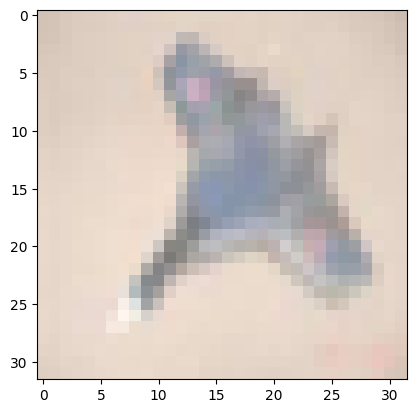

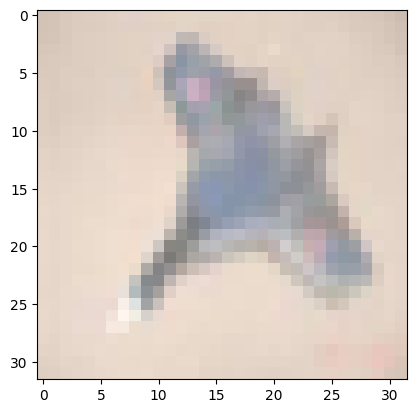

In [54]:
n =  random.randint(0,9999)

print(n)
plt.imshow(x_test[n],cmap='gray')
plt.show()
plt.imshow(x_test[n])
plt.show()

In [55]:
def get_class_name(label):
    match label:
        case 0:
            return "airplane"
        case 1:
            return "automobile"
        case 2:
            return "bird"
        case 3:
            return "cat"
        case 4:
            return "deer"
        case 5:
            return "dog"
        case 6:
            return "frog"
        case 7:
            return "horse"
        case 8:
            return "ship"
        case 9:
            return "truck"
        case _:
            return "unknown"

# Example usage:


In [56]:
#use predict() on new data
predicted_value=model.predict(x_test)
print(f"predicted image contains :{get_class_name(np.argmax(predicted_value[n]))}")
# print(f"actual digit={y_test[n]}" )

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
predicted image contains :airplane
